In [1]:
from udntools.region import CompServiceRegion
import matplotlib.pyplot as plt
import numpy as np
from udntools.utils import cdf_y_axis

In [2]:
comp_service_region = CompServiceRegion(0, 100, 0, 100,
                                        100, 10000,
                                        ue_sigma=5)

In [3]:
def get_comp_number(region):
    count = 0
    for key, values in region.cluster_set_.items():
        num = np.size(values)
        if num > 1:
            count += num
    return count

In [4]:
# 设定仿真的信干比区间
x_axis = np.arange(-10, 20.5, 0.5)

comp_service_region.cluster_by_dfs(0)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_0 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
print(get_comp_number(comp_service_region))

comp_service_region.cluster_by_kmeans(30)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_30 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
print(get_comp_number(comp_service_region))

comp_service_region.cluster_by_kmeans(50)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_50 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
print(get_comp_number(comp_service_region))

comp_service_region.cluster_by_kmeans(70)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_70 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)
print(get_comp_number(comp_service_region))

0
95
85
55


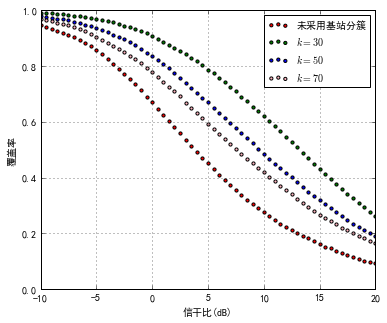

In [5]:
fig = plt.figure(figsize=(6, 5))
# 使能中文字体

# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

f0 = plt.scatter(x_axis, 1 - cdf_dfs_0, s = 10, c='r')
f30 = plt.scatter(x_axis, 1 - cdf_dfs_30, s = 10, c='g')
f50 = plt.scatter(x_axis, 1 - cdf_dfs_50, s = 10, c='b')
f70 = plt.scatter(x_axis, 1 - cdf_dfs_70, s = 10, c='lightpink')
plt.xlim(-10, 20)
plt.ylim(0,1)
plt.grid(True)

# 加图例
plt.legend(handles=[f0,
                    f30,
                    f50,
                    f70], 
           labels=[r"未采用基站分簇",
                   r"$k=30$",
                   r"$k=50$",
                   r"$k=70$"], 
           loc='best',
           prop={'size': 10})

# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', size=13)
plt.ylabel("覆盖率",fontproperties = 'SimHei', size=13)

# 存储成pdf
fig.savefig('pc_kmeans_zfbf_show.pdf')
fig.savefig('pc_kmeans_zfbf_show.png')

plt.show()